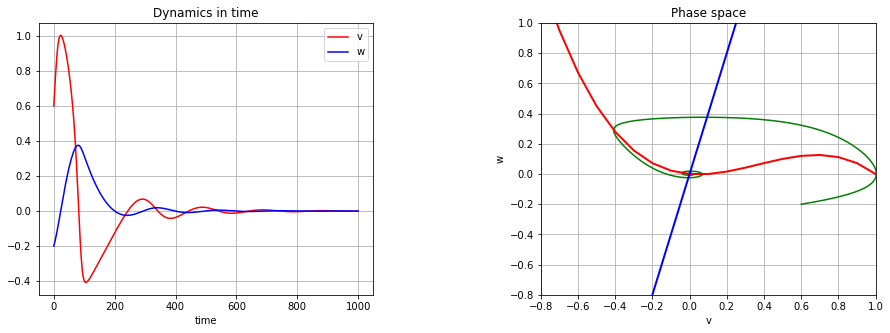

In [130]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
from scipy import integrate
import sys

# show plots in notebook
%matplotlib inline

# define system in terms of separated differential equations and parameters
I = 0;
a = .1;
eps = .1;
gamma = .25;

def f(v,w):
    return I + v*(1-v)*(v-a)-w
def g(v,w):
    return eps*(v-gamma*w)

# initialize lists containing values
v = []
w = []

#iv1, iv2 = initial values, dt = timestep, time = range

# define a template for our function or system called “sys”
def sys(iv1, iv2, dt, time):
    # initial values:
    v.append(iv1)
    w.append(iv2)
    
    # compute and fill lists
    for i in range(time):
        v.append(v[i] + (f(v[i],w[i])) * dt)
        w.append(w[i] + (g(v[i],w[i])) * dt)
    return v, w

# Call sys function with initial values
sys(.6, -.2, .1, 1000)

x = np.arange(-1,2,.1)

o = I + x*(1-x)*(x-a)
p = x/gamma

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(v, 'r-', label='v')
ax1.plot(w, 'b-', label='w')

ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.set_ylim([-.8,1])
ax2.set_xlim([-.8,1])

ax2.plot(v, w, color="green")
ax2.plot(x,o,'r-', lw=2, label='v-nullcline')
ax2.plot(x,p, 'b-', lw=2, label='w-nullcline')
ax2.set_xlabel("v")
ax2.set_ylabel("w")  
ax2.set_title("Phase space")
ax2.grid()

In [131]:

fp = []
def find_fixed_points(r):
    for v in range(r):
        for w in range(r):
            if ((f(v,w) == 0) and (g(v,w) == 0)):
                fp.append((v,w))
                print('The system has a fixed point in %s,%s' % (v,w))
    return fp

find_fixed_points(100)

The system has a fixed point in 0,0


[(0, 0)]

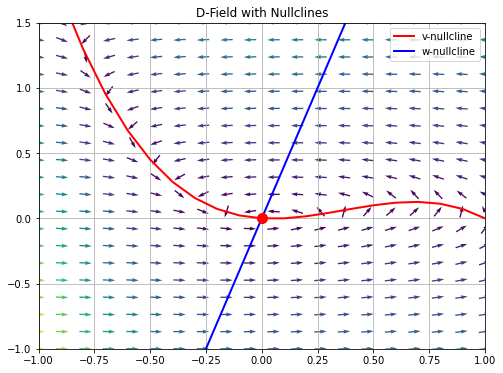

In [132]:
# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = v and x[1] = w    
    return np.array([I+X[0]*(1-X[0])*(X[0]-a)-X[1], eps*(X[0]-gamma*X[1])])

#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

#x = np.linspace(-1,1,20)
x = np.arange(-1,2,.1)

o = I + x*(1-x)*(x-a)
p = x/gamma

# plot nullclines
ax4.plot(x,o,'r-', lw=2, label='v-nullcline')
ax4.plot(x,p, 'b-', lw=2, label='w-nullcline')

# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("D-Field with Nullclines")
ax4.legend(loc='best')

# D-Field
# define a grid and compute direction at each point
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1.5, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows.
DY1 /= M

ax4.set_ylim([-1,1.5])
ax4.set_xlim([-1,1])
ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.legend()
ax4.grid()

In [133]:
# needed to calculate (complex) squareroots of negative numbers
from cmath import sqrt

def eigenvalues(v,w):
    # I + v*(1-v)*(v-a)-w
    a11 = -(3*(v**2))+2*a*v+2*v-a               # differentiated with respect to v
    a12 = -1                                    # differentiated with respect to w
    # eps*(v-gamma*w)
    a21 = eps                                   # differentiated with respect to v
    a22 = -eps*gamma                            # differentiated with respect to w

    tr = a11 + a22
    det = a11*a22 - a12*a21
    print('Check the fixed point  %s, %s' % (v,w)) 
    print('The value of (T^2-4D) is %s, so the eigenvalues are complete conjugate pairs' %(tr**2 - 4*det))
    lambda1 = (tr - sqrt(tr**2 - 4*det))/2
    lambda2 = (tr + sqrt(tr**2 - 4*det))/2
    print('The real part of the first eigenvalue is %s' %lambda1.real)
    print('The real part of the second eigenvalue is %s' % lambda2.real)    

    if (lambda1.real < 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a sink. It is stable' % (v,w))
    if (lambda1.real > 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is a source. It is unstable' % (v,w))
    if (lambda1.real > 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a saddle. It is unstable' % (v,w))
    if (lambda1.real < 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is unstable' % (v,w))
    print('----------------------------')
    return lambda1 , lambda2

# iterate through list of fixed points
for v,w in fp:
    eigenvalues(v,w)

Check the fixed point  0, 0
The value of (T^2-4D) is -0.39437500000000003, so the eigenvalues are complete conjugate pairs
The real part of the first eigenvalue is -0.0625
The real part of the second eigenvalue is -0.0625
The fixed point in 0, 0 is a sink. It is stable
----------------------------


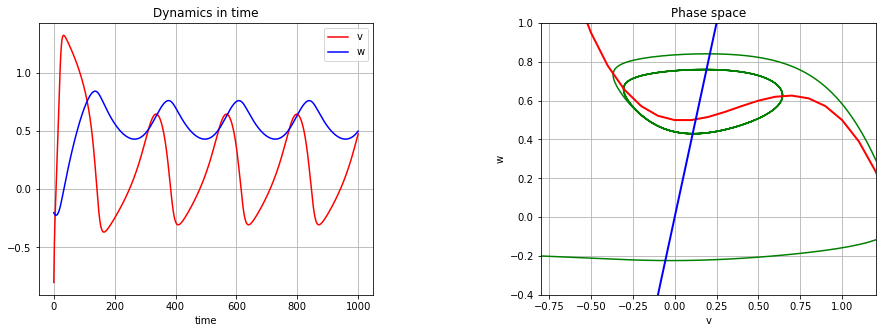

In [134]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
from scipy import integrate
import sys

# show plots in notebook
%matplotlib inline

# define system in terms of separated differential equations and parameters
I = .5;
a = .1;
eps = .1;
gamma = .25;

def f(v,w):
    return I + v*(1.0-v)*(v-a)-w
def g(v,w):
    return eps*(v-gamma*w)

# initialize lists containing values
v = []
w = []

#iv1, iv2 = initial values, dt = timestep, time = range

# define a template for our function or system called “sys”
def sys(iv1, iv2, dt, time):
    # initial values:
    v.append(iv1)
    w.append(iv2)
    
    # compute and fill lists
    for i in range(time):
        v.append(v[i] + (f(v[i],w[i])) * dt)
        w.append(w[i] + (g(v[i],w[i])) * dt)
    return v, w

# Call sys function with initial values
sys(-.8, -.2, .1, 1000)

x = np.arange(-1,2,.1)

o = I + x*(1-x)*(x-a)
p = x/gamma

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(v, 'r-', label='v')
ax1.plot(w, 'b-', label='w')

ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.set_ylim([-.4,1])
ax2.set_xlim([-.8,1.2])

ax2.plot(v, w, color="green")
ax2.plot(x,o,'r-', lw=2, label='v-nullcline')
ax2.plot(x,p, 'b-', lw=2, label='w-nullcline')
ax2.set_xlabel("v")
ax2.set_ylabel("w")  
ax2.set_title("Phase space")
ax2.grid()

In [135]:
import sympy as sm
# define the system in this way (asuming a predator-prey-system with no negative values)
# to avoid interference x = r (for resource) and y = c (for consumer) 
r, c = sm.symbols('r, c', negative=False)
R = I + r*(1.0-r)*(r-a)-c
C = eps*(r-gamma*c)

# use sympy's way of setting equations to zero
REqual = sm.Eq(R, 0)
CEqual = sm.Eq(C, 0)

# compute fixed points
equilibria = sm.solve( (REqual, CEqual), r, c )
l = []
l.append((equilibria[0][0],equilibria[0][1]))
print(l)

[(0.125706308010750, 0.502825232043000)]


[(0.125706308010750, 0.502825232043000)]


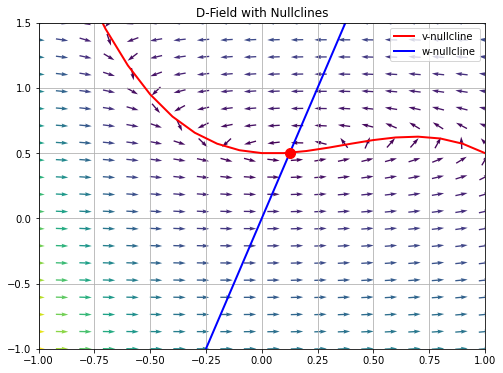

In [136]:
# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = v and x[1] = w    
    return np.array([I+X[0]*(1-X[0])*(X[0]-a)-X[1], eps*(X[0]-gamma*X[1])])

#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

#x = np.linspace(-1,1,20)
x = np.arange(-1,2,.1)

o = I + x*(1-x)*(x-a)
p = x/gamma

# plot nullclines
ax4.plot(x,o,'r-', lw=2, label='v-nullcline')
ax4.plot(x,p, 'b-', lw=2, label='w-nullcline')

# plot fixed points
for point in l:
    print(l)
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("D-Field with Nullclines")
ax4.legend(loc='best')

# D-Field
# define a grid and compute direction at each point
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1.5, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows.
DY1 /= M

ax4.set_ylim([-1,1.5])
ax4.set_xlim([-1,1])
ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.legend()
ax4.grid()

In [137]:
# needed to calculate (complex) squareroots of negative numbers
from cmath import sqrt

def eigenvalues(v,w):
    # I + v*(1-v)*(v-a)-w
    a11 = -(3*(v**2))+2*a*v+2*v-a               # differentiated with respect to v
    a12 = -1                                    # differentiated with respect to w
    # eps*(v-gamma*w)
    a21 = eps                                   # differentiated with respect to v
    a22 = -eps*gamma                            # differentiated with respect to w

    tr = a11 + a22
    det = a11*a22 - a12*a21
    print('Check the fixed point  %s, %s' % (v,w)) 
    print('The value of (T^2-4D) is %s, so the eigenvalues are complete conjugate pairs' %(tr**2 - 4*det))
    lambda1 = (tr - sqrt(tr**2 - 4*det))/2
    lambda2 = (tr + sqrt(tr**2 - 4*det))/2
    lambdareal = (tr/2.0)
    print('The real part of the first eigenvalue is %s' % lambdareal)
    print('The real part of the second eigenvalue is %s' % lambdareal)    

    if (lambdareal < 0 and lambdareal < 0):
        print('The fixed point in %s, %s is a sink. It is stable' % (v,w))
    if (lambdareal > 0 and lambdareal > 0):
        print('The fixed point in %s, %s is a source. It is unstable' % (v,w))
    if (lambdareal > 0 and lambdareal < 0):
        print('The fixed point in %s, %s is a saddle. It is unstable' % (v,w))
    if (lambdareal < 0 and lambdareal > 0):
        print('The fixed point in %s, %s is unstable' % (v,w))
    print('----------------------------')
    return lambda1 , lambda2

# iterate through list of fixed points
for v,w in l:
    eigenvalues(v,w)

Check the fixed point  0.125706308010750, 0.502825232043000
The value of (T^2-4D) is -0.376238501998685, so the eigenvalues are complete conjugate pairs
The real part of the first eigenvalue is 0.0520738250012847
The real part of the second eigenvalue is 0.0520738250012847
The fixed point in 0.125706308010750, 0.502825232043000 is a source. It is unstable
----------------------------
